In [60]:
%load_ext autoreload
%autoreload 2
import numpy as np
from forest_fire import ForestFire, Tree
from pandas import DataFrame

from projects.agent_based_modelling.lib import batch_run
from projects.agent_based_modelling.lib.plot import animate_show


def plot_mean(_df: DataFrame, key: str):
    (_df.groupby(["p", "size"]).mean().reset_index().set_index("p").groupby("size")[key].plot(legend=True))


def tree_to_color(tree: Tree) -> str:
    return tree.state.color()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


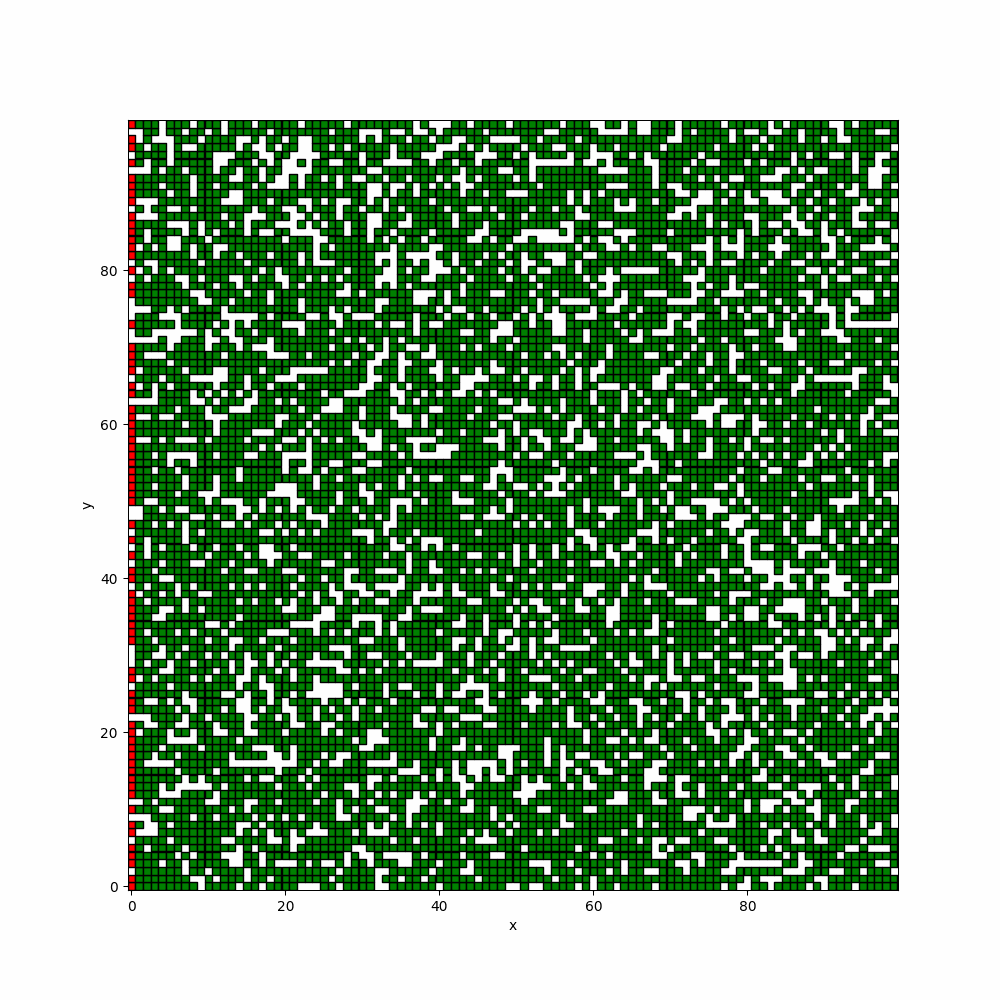

In [52]:
animate_show(
    model=ForestFire(size=100, p=0.7),
    agent_color_func=tree_to_color,
)

In [61]:
df = batch_run(
    cls=ForestFire,
    params=dict(
        size=[20, 50, 100],
        p=np.arange(start=0, stop=1, step=0.01),
    ),
    iterations=100,
)

100%|██████████| 30000/30000 [17:17<00:00, 28.91it/s]  


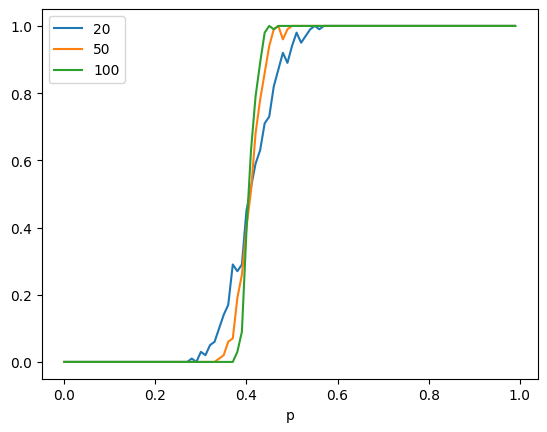

In [62]:
plot_mean(df, "opposite_edge_hit")

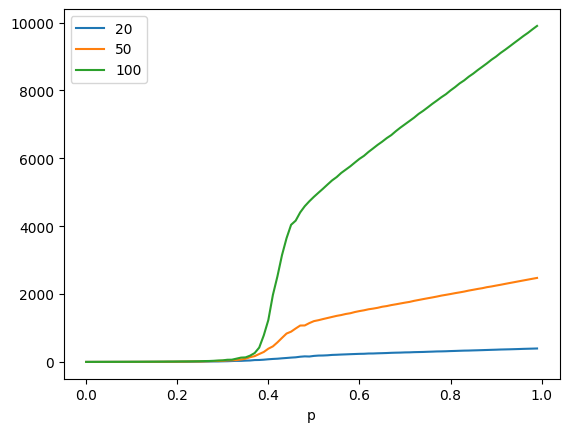

In [63]:
plot_mean(df, "biggest_burned_cluster")